# Actividad 1: Proyecto de Python

Para este análisis se utilizó el dataset Superstore extraído de la plataforma Kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')

## Limpieza y transformación

Revisamos las columnas, valores nulos, duplicados y se ajustan los tipos de datos si es necesario.

In [ ]:
# Información general
df.info()

# Revisar valores nulos
df.isnull().sum()

# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Cambiamos el tipo de datos del código postal ya que no lo utilizaremos para hacer operaciones aritméticas

In [ ]:
df['Postal Code'] = df['Postal Code'].astype(str)

Creamos la variable de Margen de ganancia para poder analizarla posteriormente

In [ ]:
df['Profit_Margin'] = df['Profit'] / df['Sales']

## Análisis Exploratorio de Datos (EDA)

Se exploran las principales estadísticas descriptivas y relaciones básicas entre las variables.

In [ ]:
# Estadísticas básicas
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Profit_Margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896,0.120314
std,2885.163629,623.245101,2.225110,0.206452,234.260108,0.466754
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750,0.075000
50%,4997.500000,54.490000,3.000000,0.200000,8.666500,0.270000
75%,7495.750000,209.940000,5.000000,0.200000,29.364000,0.362500
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000


In [ ]:
# Ventas y profit por categoría
df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741999.7953,18451.2728


In [ ]:
# Margen de ganancia por categoría
df.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=False)

,Profit_Margin
Category,
Technology,0.156138
Office Supplies,0.138030
Furniture,0.038784


In [ ]:
# Ventas y ganancias por Estado
df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
Indiana,53555.3600,18382.9363
Georgia,49095.8400,16250.0433
Kentucky,36591.7500,11199.6966
Minnesota,29863.1500,10823.1874


In [ ]:
# Margen de ganancia por Estado
df.groupby('State')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

,Profit_Margin
State,
District of Columbia,0.422000
Iowa,0.399333
Arkansas,0.379500
South Dakota,0.377500
Maine,0.363750
Minnesota,0.357978
North Dakota,0.351429
Delaware,0.350074
Indiana,0.347852


In [ ]:
# Ventas y ganancias por producto
df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7753.0390
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
Canon PC1060 Personal Laser Copier,11619.834,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766
Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.290,3696.2820
Ibico EPK-21 Electric Binding System,15875.916,3345.2823


In [ ]:
# Margen de ganancia por producto
df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

,Profit_Margin
Product Name,
Southworth Structures Collection,0.50
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,0.50
"Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book",0.50
Avery 475,0.50
Xerox 1890,0.50
Tops Green Bar Computer Printout Paper,0.50
Avery 5,0.49
Xerox 1918,0.49
Avery 478,0.49


In [ ]:
# Ventas y ganancias por sub-categoría
df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

,Sales,Profit
Sub-Category,,
Copiers,149528.030,55617.8249
Phones,330007.054,44515.7306
Accessories,167380.318,41936.6357
Paper,78479.206,34053.5693
Binders,203412.733,30221.7633
Chairs,328449.103,26590.1663
Storage,223843.608,21278.8264
Appliances,107532.161,18138.0054
Furnishings,91705.164,13059.1436


In [ ]:
# Margen de ganancia por sub-categoría
df.groupby('Sub-Category')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

,Profit_Margin
Sub-Category,
Labels,0.429663
Paper,0.425600
Envelopes,0.423140
Copiers,0.317194
Fasteners,0.299171
Art,0.251646
Accessories,0.218210
Furnishings,0.137066
Phones,0.119222


In [ ]:
# Ventas y ganancias por segmento
df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [ ]:
# Margen de ganancia por segmento
df.groupby('Segment')['Profit_Margin'].mean().sort_values(ascending=False)

,Profit_Margin
Segment,
Home Office,0.142870
Corporate,0.121203
Consumer,0.112050


## Visualización de datos

Se usan gráficos para identificar patrones, distribuciones y relaciones clave entre variables.

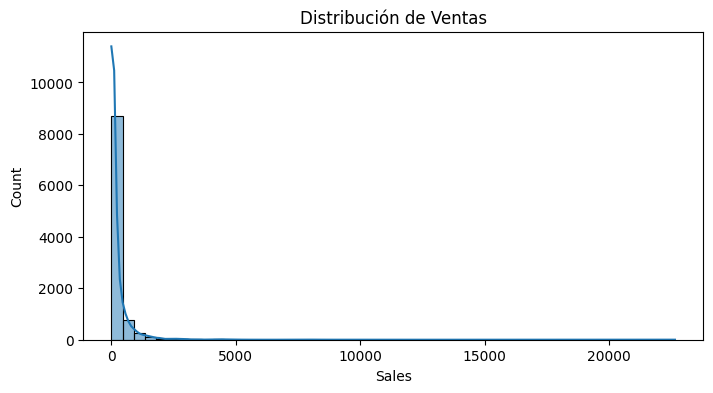

In [ ]:
# Histograma de ventas
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribución de Ventas')
plt.show()

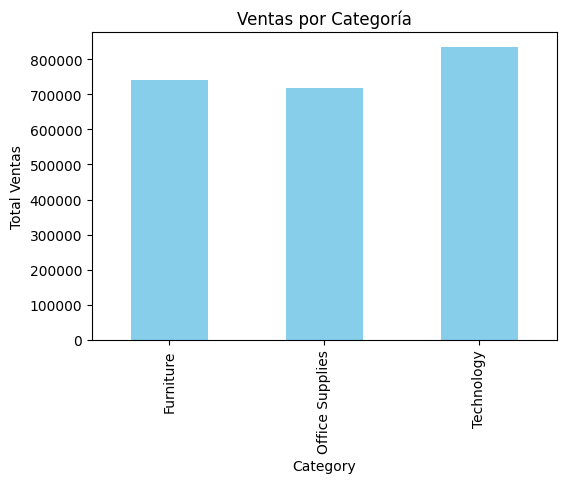

In [ ]:
# Gráfico de barras: ventas por categoría
plt.figure(figsize=(6,4))
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Ventas por Categoría')
plt.ylabel('Total Ventas')
plt.show()

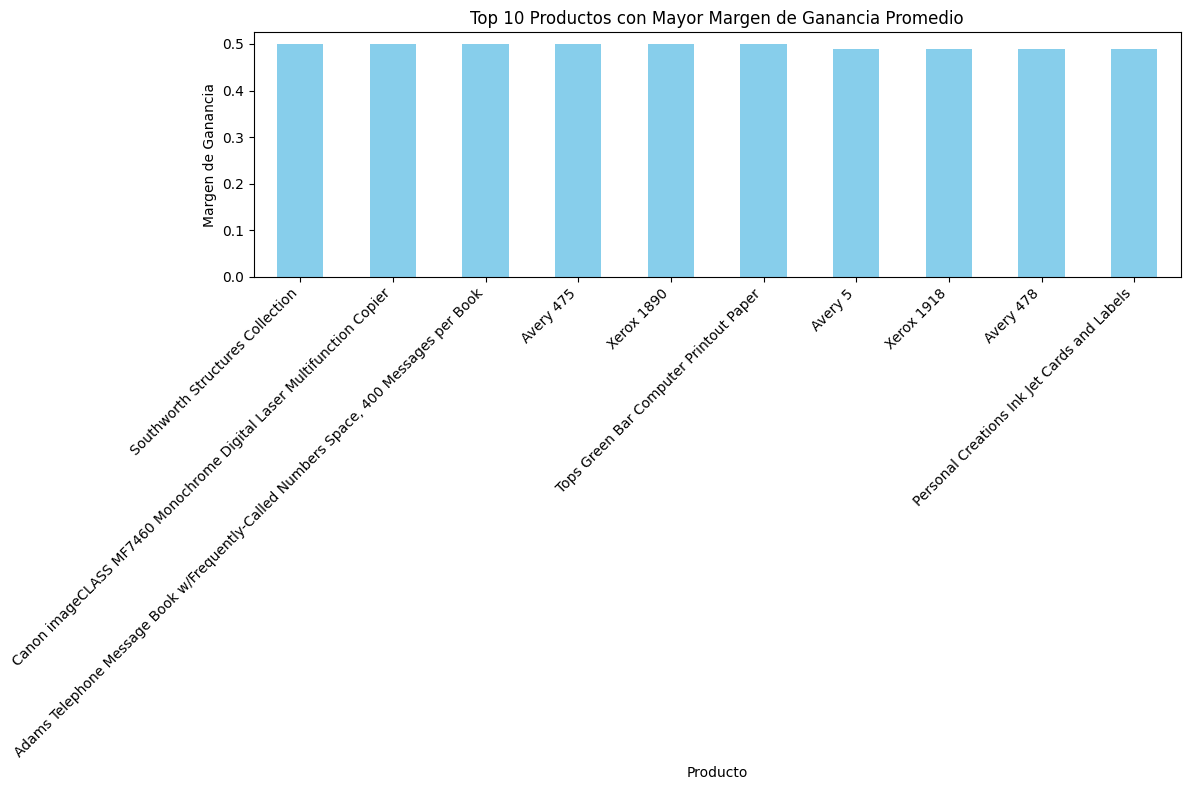

In [ ]:
# Top 10 productos por margen promedio
top_10_margin = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

# Gráfica
plt.figure(figsize=(12, 8))
top_10_margin.plot(kind='bar', color='skyblue')
plt.title('Top 10 Productos con Mayor Margen de Ganancia Promedio')
plt.ylabel('Margen de Ganancia')
plt.xlabel('Producto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusiones

Estadísticas Generales

Ventas: Las ventas promedio son de aproximadamente 229.86, con un rango considerable que va desde 0.44 hasta 22638.48. Esto indica una gran variación en el valor de las transacciones.

Ganancias: La ganancia promedio es de alrededor de 28.66. Sin embargo, es importante destacar que se observan ganancias negativas (pérdidas), con un mínimo de -6599.98.

Margen de Ganancia: El margen de ganancia promedio es del 12%. Similar a las ganancias, el margen puede ser negativo, alcanzando un mínimo de -2.75, lo que refuerza la presencia de operaciones con pérdidas.


---

Por Categoría

Tecnología y Material de Oficina: Líderes en ventas y ganancias con márgenes altos (~17%), son pilares de la rentabilidad.

Mobiliario: A pesar de sus altas ventas, tiene un margen de ganancia muy bajo (~2.5%), indicando problemas de costos o precios que erosionan la rentabilidad.

---

Por Estado

Estados como California y Nueva York aportan las mayores ganancias totales, con márgenes sólidos.

Washington destaca por un margen excepcionalmente alto (~24%), sugiriendo operaciones muy eficientes.

Estados como Texas y Ohio registran pérdidas significativas a pesar de las ventas, con márgenes negativos, requiriendo investigación urgente.

---

Por Producto

Los productos de mayor ganancia (ej. copiadoras) también tienen márgenes muy altos (frecuentemente >30-40%).

Oportunidad: Identificar y potenciar productos con márgenes muy elevados pero bajo volumen actual de ventas para aumentar la rentabilidad general de forma eficiente.

